## Data Preparation and Exploration.

This notebook is focused on preparing, cleaning and exploring a dataset that as been gathered at two solar power plants in India over a 34 day period

The goal is to apply this dataset to machine learning models to predict solar power plant output.


Points to look out for in a clean data:
* Making sure the data is presented in a way that makes sense with all the variables correct.
* Ensure that the variables make sense and are correct.
* Eliminating duplicate rows and columns as well as elimiating columns that provide redundant information.
* Dealing with missing data appropriately.

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

import warnings
warnings.filterwarnings("ignore")


### Preliminary Analysis
The power generation datasets are gathered at the inverter level - each inverter has multiple lines of solar panels attached to it. The sensor data is gathered at a plant level - single array of sensors optimally placed at the plant.

In [2]:
### Reading in the data
generation_dataset = pd.read_csv('Plant_1_Generation_Data.csv')
weather_dataset = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

In [3]:
generation_dataset.head(10)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0
5,15-05-2020 00:00,4135001,VHMLBKoKgIrUVDU,0.0,0.0,0.0,7206408.0
6,15-05-2020 00:00,4135001,WRmjgnKYAwPKWDb,0.0,0.0,0.0,7028673.0
7,15-05-2020 00:00,4135001,ZnxXDlPa8U1GXgE,0.0,0.0,0.0,6522172.0
8,15-05-2020 00:00,4135001,ZoEaEvLYb1n2sOq,0.0,0.0,0.0,7098099.0
9,15-05-2020 00:00,4135001,adLQvlD726eNBSB,0.0,0.0,0.0,6271355.0


In [4]:
generation_dataset.shape

(68778, 7)

Generation dataset contains 68778 rows and 7 columns

In [5]:
weather_dataset.head(10)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
5,2020-05-15 01:15:00,4135001,HmiyD2TTLFNqkNe,24.536092,21.968571,0.0
6,2020-05-15 01:30:00,4135001,HmiyD2TTLFNqkNe,24.638674,22.352926,0.0
7,2020-05-15 01:45:00,4135001,HmiyD2TTLFNqkNe,24.873022,23.160919,0.0
8,2020-05-15 02:00:00,4135001,HmiyD2TTLFNqkNe,24.936930,23.026113,0.0
9,2020-05-15 02:15:00,4135001,HmiyD2TTLFNqkNe,25.012248,23.343229,0.0


In [6]:
weather_dataset.shape

(3182, 6)

Weather dataset contains 3259 rows and 6 columns

Formatting DATE_TIME columns and merging the two dataframes.

In [7]:
generation_dataset['DATE_TIME'] = pd.to_datetime(generation_dataset['DATE_TIME'])
weather_dataset['DATE_TIME'] = pd.to_datetime(weather_dataset['DATE_TIME'])

In [8]:
df_solar_data = pd.merge(generation_dataset.drop(columns = ['PLANT_ID']), weather_dataset.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')



In [9]:
df_solar_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45680 entries, 0 to 45679
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            45680 non-null  datetime64[ns]
 1   SOURCE_KEY           45680 non-null  object        
 2   DC_POWER             45680 non-null  float64       
 3   AC_POWER             45680 non-null  float64       
 4   DAILY_YIELD          45680 non-null  float64       
 5   TOTAL_YIELD          45680 non-null  float64       
 6   AMBIENT_TEMPERATURE  45680 non-null  float64       
 7   MODULE_TEMPERATURE   45680 non-null  float64       
 8   IRRADIATION          45680 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 3.5+ MB


Extract separate date-related components


In [10]:
df_solar_data['TIME_IN_SECONDS'] = df_solar_data['DATE_TIME'].dt.hour * 3600 + df_solar_data['DATE_TIME'].dt.minute * 60 + df_solar_data['DATE_TIME'].dt.second
df_solar_data['WEEK'] = df_solar_data['DATE_TIME'].dt.isocalendar().week
df_solar_data['MONTH'] = df_solar_data['DATE_TIME'].dt.month
df_solar_data['DAY'] = df_solar_data['DATE_TIME'].dt.day

In [11]:
df_solar_data.drop(columns=['DATE_TIME'], inplace=True)

In [12]:
df_solar_data.sample(5)

,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,TIME_IN_SECONDS,WEEK,MONTH,DAY
5907,uHbuxQJl8lW7ozc,0.000,0.0000,7454.000,7058793.000,21.315892,20.690883,0.000000,81900,20,5,17
38635,uHbuxQJl8lW7ozc,10205.000,996.7125,6369.625,7266900.625,27.408714,47.941766,0.709480,54900,24,6,14
32711,bvBOhCH3iADSZry,0.000,0.0000,5586.000,6433267.000,25.760655,23.739868,0.000000,69300,22,5,31
1112,adLQvlD726eNBSB,9249.500,904.3125,3411.625,6274766.625,32.391420,50.631240,0.761243,45900,20,5,15
14012,iCRJl6heRkivqQ3,5124.125,502.4750,1281.875,7228723.875,27.166537,39.336534,0.375922,35100,21,5,22


In [13]:
# A summary of each column, the datatypes and the number of non-null values 

df_solar_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45680 entries, 0 to 45679
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SOURCE_KEY           45680 non-null  object 
 1   DC_POWER             45680 non-null  float64
 2   AC_POWER             45680 non-null  float64
 3   DAILY_YIELD          45680 non-null  float64
 4   TOTAL_YIELD          45680 non-null  float64
 5   AMBIENT_TEMPERATURE  45680 non-null  float64
 6   MODULE_TEMPERATURE   45680 non-null  float64
 7   IRRADIATION          45680 non-null  float64
 8   TIME_IN_SECONDS      45680 non-null  int64  
 9   WEEK                 45680 non-null  UInt32 
 10  MONTH                45680 non-null  int64  
 11  DAY                  45680 non-null  int64  
dtypes: UInt32(1), float64(7), int64(3), object(1)
memory usage: 4.4+ MB


Convert 'SOURCE_KEY' to numerical type

In [14]:
from sklearn.preprocessing import *

encoder = LabelEncoder()

df_solar_data['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_solar_data['SOURCE_KEY'])

df_solar_data.drop(columns=['SOURCE_KEY'], inplace=True)


In [15]:
df_solar_data.sample(10).style.background_gradient(cmap='Blues')

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,TIME_IN_SECONDS,WEEK,MONTH,DAY,SOURCE_KEY_NUMBER
10994,10282.875000,1005.287500,1900.500000,7212618.500000,28.077588,48.340348,0.751681,36000,21,5,20,12
31092,0.000000,0.000000,0.000000,6457301.000000,23.670286,22.421460,0.000000,2700,22,5,31,20
4722,5980.142857,586.014286,1117.714286,6353267.714000,27.985940,45.117410,0.441706,33300,20,5,17,20
20867,0.000000,0.000000,8813.000000,7261464.000000,26.844663,24.812990,0.000000,68400,22,5,25,7
36224,13226.125000,1289.550000,4182.125000,7377510.125000,29.614476,54.576355,0.958228,43200,24,6,13,4
43153,0.000000,0.000000,6166.000000,7840965.000000,25.180570,23.465541,0.000056,67500,25,6,16,3
18521,3213.750000,315.075000,7271.375000,7251951.375000,32.816960,40.095430,0.214468,56700,21,5,24,7
29975,9925.142857,969.714286,2859.285714,7717694.286000,27.673415,62.916433,0.799824,44100,22,5,30,3
11113,12123.142860,1182.014286,3258.571429,7151595.571000,29.735262,53.648472,0.900070,40500,21,5,20,21
12318,10599.285710,1034.671429,5728.285714,7063789.286000,31.688391,55.696511,0.861283,49500,21,5,21,16


### Looking for null and missing values.

In [16]:
df_solar_data.isnull().sum()


DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
TIME_IN_SECONDS        0
WEEK                   0
MONTH                  0
DAY                    0
SOURCE_KEY_NUMBER      0
dtype: int64

### Checking for Duplicate rows/ redundant information

In [17]:
#Checking for duplicate rows
df_solar_data.duplicated().sum()

0

In [18]:
#Checking for duplicate columns
df_solar_data.T.duplicated()

DC_POWER               False
AC_POWER               False
DAILY_YIELD            False
TOTAL_YIELD            False
AMBIENT_TEMPERATURE    False
MODULE_TEMPERATURE     False
IRRADIATION            False
TIME_IN_SECONDS        False
WEEK                   False
MONTH                  False
DAY                    False
SOURCE_KEY_NUMBER      False
dtype: bool

# Feature Matrix

In [19]:
X = df_solar_data.drop(columns = ['AC_POWER'])
y = df_solar_data['AC_POWER']

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45680 entries, 0 to 45679
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DC_POWER             45680 non-null  float64
 1   DAILY_YIELD          45680 non-null  float64
 2   TOTAL_YIELD          45680 non-null  float64
 3   AMBIENT_TEMPERATURE  45680 non-null  float64
 4   MODULE_TEMPERATURE   45680 non-null  float64
 5   IRRADIATION          45680 non-null  float64
 6   TIME_IN_SECONDS      45680 non-null  int64  
 7   WEEK                 45680 non-null  UInt32 
 8   MONTH                45680 non-null  int64  
 9   DAY                  45680 non-null  int64  
 10  SOURCE_KEY_NUMBER    45680 non-null  int32  
dtypes: UInt32(1), float64(6), int32(1), int64(3)
memory usage: 4.9 MB


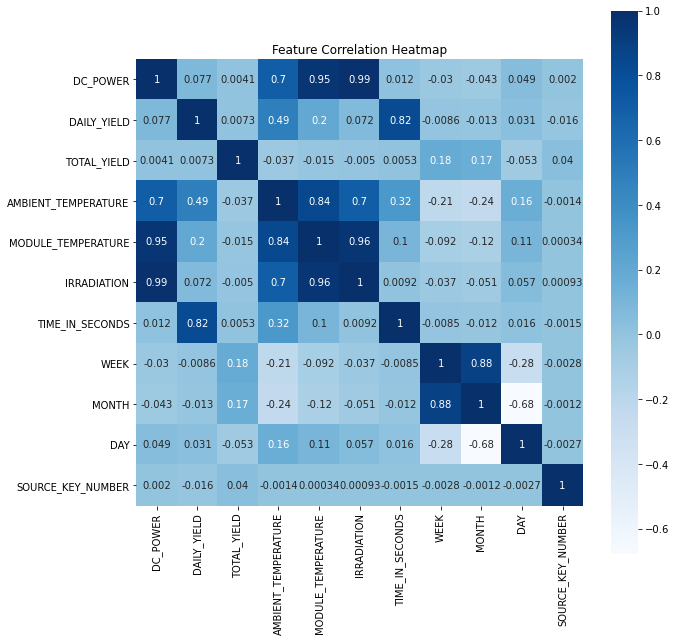

In [21]:
corr_df = X.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_df, cbar=True, square=True, annot=True, cmap="Blues")
plt.title('Feature Correlation Heatmap')
plt.show()

#### Collinearity & Multicollinearity


**What is it?**

- **Collinearity** refers to the situation when two independent variables are correlated with one another.
- **Multicollinearity** is the situation where one independent variable can be expressed as a linear combination of two or more other independent variables (in other words, the independent variables are in a linear relationship with *each other*).

**What does it do to our models?**

- When two or more predictor variables in a regression model are highly correlated, meaning that they contain similar information about the variance of the dependent variable. This can affect the performance and interpretation of various machine learning models. 


Looking at correlation values greater than 0.7:

* DC_Power is highly correlated with Module_Temperature, solution is to drop one of these variable eg: DC_Power
* DC_Power is also highly correlated with Irradiation, if DC_Power is drop that should resolve this.
* Daily_Yield is highly correlated with Time_In_Seconds, so Time_In_Seconds will be dropped.
* Ambient_Temperature is highly correlated with Module_Temperature, so Module_Temperature will be dropped.
* Module_Temperature is highly correlated with Irradiation, dropping Module_Temperature will be dropped.
* Week is highly correlated with Month, so Week will be dropped.

In [22]:
X.drop(columns = ['DC_POWER','TIME_IN_SECONDS','MODULE_TEMPERATURE','WEEK'], inplace=True)

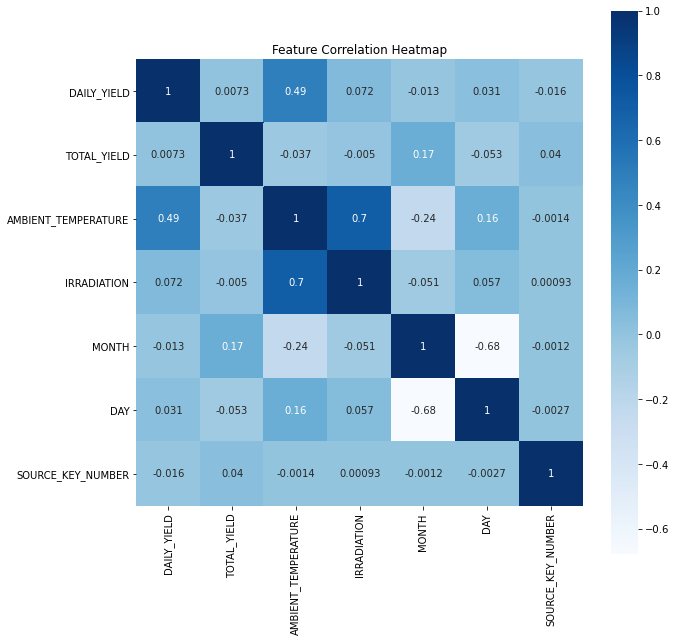

In [23]:
corr_df = X.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_df, cbar=True, square=True, annot=True, cmap="Blues")
plt.title('Feature Correlation Heatmap')
plt.show()

From the above plot, multicollinearity is solved.

Separating dataset into testing and training dataset

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test.shape, X_train.shape

((9136, 7), (36544, 7))

### Solar Prediction

LINEAR REGRESSION

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Instantiate the model
linear_regression_model = LinearRegression()

# Fit the model
linear_regression_model.fit(X_train, y_train)

# Model Prediction
y_pred = linear_regression_model.predict(X_test)

# Compute the R^2 score
r2 = 100*r2_score(y_test, y_pred)
print(f'Linear Regression Model score = {r2:4.4f}%')

Linear Regression Model score = 98.3802%


Random forests

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score


# Initialize the Random Forest Regressor
model_RF = RandomForestRegressor(
    n_estimators=200,         # Increase number of trees
    max_depth=10,             # Limit the depth of the trees
    min_samples_split=20,     # Increase min samples required to split an internal node
    min_samples_leaf=20,      # Increase min samples required to be at a leaf node
    max_features='sqrt',      # Reduce the number of features to consider at each split
    random_state=42
)

# Fit the model to the training data
model_RF.fit(X_train, y_train)

# Perform cross-validation
cv_scores = cross_val_score(model_RF, X_train, y_train, cv=5, scoring='r2')

# Output the cross-validation scores
print(f'R^2 scores: {cv_scores}')
print(f'Average R^2: {cv_scores.mean():.4f}')


R^2 scores: [0.98519057 0.98587505 0.98534914 0.98530637 0.98679115]
Average R^2: 0.9857


In [27]:
# Make predictions on the test set
y_pred = model_RF.predict(X_test)

# Evaluate the model's performance on the test set
r2 = r2_score(y_test, y_pred)

print(f'R^2 score on the test set: {r2:.4f}')

R^2 score on the test set: 0.9868
